# 1.- Comprensión de los Datos en Bruto
Vamos a realizar un análisis de los datos que contiene nuestro dataset para ver qué tipo de datos tenemos, a qué clases pertenecen, volumen de datos, valores ausentes, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Variables Globales
retraso = 2             # Indica qué diferencia de años se usa para los cálculos diferenciales
tiempo_prediccion = 2   # Indica con cuantos años de antelación queremos predecir una posible crisis
tiempo_recesion = 4     # Indica cuantos años se consideran como post-crisis y serán eliminados junto
                        # a los años de crisis para evitar sesgo en los datos

## 1.1- Características generales

In [3]:
# Cqrgamos nuestro dataset
data = pd.read_csv('../datasets/JSTdatasetR6.csv', sep=';', na_values='', decimal=',')

# Modificación de parámetros de visualización para que dado que el número de columnas es grande se muestren todas a la vez
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

# Revisamos la tipología de los datos
print('Tipología de atributos:')
display(data.dtypes)

# Revisamos las características de los mismos
print('\n\nCaracteristicas de atributos:')
display(data.describe(include='all'))
display(data.info(show_counts=True))

# Revisamos el número de instancias y atributos
print(f'\n\nVolumetría de datos:\nNúmero de Instancias: {data.shape[0]}\nNúmero de Atributos: {data.shape[1]-1}\n\n')
# Revisamos el número total de países
print(f'Número Total de Países: {len(np.unique(data["iso"]))}')

# Revisamos el número total de años y sus valores
print(f'Número Total de Años: {len(np.unique(data["year"]))}')
print(f'{np.unique(data["year"])}\n\n')

# Mostramos una muestra de los registros
print('Muestra de datos:')
display(data.sample(5))

Tipología de atributos:


year                          int64
country                      object
iso                          object
ifs                           int64
pop                         float64
rgdpmad                     float64
rgdpbarro                   float64
rconsbarro                  float64
gdp                         float64
iy                          float64
cpi                         float64
ca                          float64
imports                     float64
exports                     float64
narrowm                     float64
money                       float64
stir                        float64
ltrate                      float64
hpnom                       float64
unemp                       float64
wage                        float64
debtgdp                     float64
revenue                     float64
expenditure                 float64
xrusd                       float64
tloans                      float64
tmort                       float64
thh                         



Caracteristicas de atributos:


year    country   iso          ifs            pop       rgdpmad  \
count   2718.00000       2718  2718  2718.000000    2667.000000   2666.000000   
unique         NaN         18    18          NaN            NaN           NaN   
top            NaN  Australia   AUS          NaN            NaN           NaN   
freq           NaN        151   151          NaN            NaN           NaN   
mean    1945.00000        NaN   NaN   148.333333   31439.397574   9155.064763   
std       43.59701        NaN   NaN    24.165940   45898.993728   7976.190143   
min     1870.00000        NaN   NaN   111.000000    1675.000000    737.375497   
25%     1907.00000        NaN   NaN   132.000000    4866.650000   2873.047663   
50%     1945.00000        NaN   NaN   143.000000   10113.530000   5477.011227   
75%     1983.00000        NaN   NaN   172.000000   45077.000000  14619.435708   
max     2020.00000        NaN   NaN   193.000000  329239.715278  45887.569802   

          rgdpbarro   rconsbarro           gdp           iy           cpi  \
count   2664.000000  2561.000000  2.641000e+03  2425.000000  2.666000e+03   
unique          NaN          NaN           NaN          NaN           NaN   
top             NaN          NaN           NaN          NaN           NaN   
freq            NaN          NaN           NaN          NaN           NaN   
mean      39.793748    42.133609  2.454826e+06     0.188838  4.191118e+01   
std       33.884462    32.274402  1.615548e+07     0.064621  5.689962e+01   
min        3.263085     4.074400  1.250757e-11     0.017287  1.150362e-11   
25%       12.694448    15.650000  5.428200e+01     0.140980  2.526395e+00   
50%       23.056114    27.846700  1.810926e+03     0.194356  1.050679e+01   
75%       65.770534    68.720000  5.038345e+04     0.230288  7.617557e+01   
max      147.282620   120.431162  2.070466e+08     0.546975  2.268252e+02   

                  ca       imports       exports       narrowm         money  \
count   2.489000e+03  2.603000e+03  2.603000e+03  2.604000e+03  2.518000e+03   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean   -4.572271e+04  8.097705e+05  7.925207e+05  1.178995e+06  2.404282e+06   
std     7.670287e+05  4.947326e+06  4.956606e+06  1.077840e+07  1.645903e+07   
min    -1.687900e+07  2.803000e-12  2.278000e-12  1.084000e-12  2.919525e-12   
25%    -6.345947e+01  5.029000e+00  5.110800e+00  9.363653e+00  1.630303e+01   
50%    -3.300000e-02  4.873701e+02  4.523997e+02  3.109166e+02  8.713446e+02   
75%     1.788000e+01  1.217368e+04  1.040987e+04  1.301771e+04  2.375057e+04   
max     5.885998e+06  6.630599e+07  7.237242e+07  2.330690e+08  2.357367e+08   

               stir       ltrate         hpnom        unemp          wage  \
count   2520.000000  2630.000000  2.050000e+03  1949.000000  2.630000e+03   
unique          NaN          NaN           NaN          NaN           NaN   
top             NaN          NaN           NaN          NaN           NaN   
freq            NaN          NaN           NaN          NaN           NaN   
mean       4.677768     5.448643  6.695866e+01     5.484313  4.502840e+01   
std        3.332995     3.157725  1.061554e+02     4.081174  7.226900e+01   
min       -2.000000    -0.525000  3.014026e-12     0.035923  8.320876e-13   
25%        2.627500     3.587708  2.423478e+00     2.300000  4.557921e-01   
50%        4.122500     4.609167  9.883473e+00     4.600000  3.711042e+00   
75%        5.758750     6.329375  9.785925e+01     7.524200  7.435417e+01   
max       21.273300    23.715415  6.459109e+02    26.093600  3.236591e+02   

            debtgdp       revenue   expenditure         xrusd        tloans  \
count   2489.000000  2.542000e+03  2.561000e+03  2.665000e+03  2.465000e+03   
unique          NaN           NaN           NaN           NaN           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2718 non-null   int64  
 1   country                   2718 non-null   object 
 2   iso                       2718 non-null   object 
 3   ifs                       2718 non-null   int64  
 4   pop                       2667 non-null   float64
 5   rgdpmad                   2666 non-null   float64
 6   rgdpbarro                 2664 non-null   float64
 7   rconsbarro                2561 non-null   float64
 8   gdp                       2641 non-null   float64
 9   iy                        2425 non-null   float64
 10  cpi                       2666 non-null   float64
 11  ca                        2489 non-null   float64
 12  imports                   2603 non-null   float64
 13  exports                   2603 non-null   float64
 14  narrowm 

None



Volumetría de datos:
Número de Instancias: 2718
Número de Atributos: 58


Número Total de Países: 18
Número Total de Años: 151
[1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


Muestra de datos:


year      country  iso  ifs       pop       rgdpmad  rgdpbarro  \
2053  1960  Netherlands  NLD  138   11486.0   8286.609786  34.996570   
2688  1991          USA  USA  111  253492.5  22832.790046  74.950790   
2518  1972       Sweden  SWE  144    8122.0  13001.751969  55.929635   
1547  1907      Ireland  IRL  178       NaN           NaN        NaN   
2472  1926       Sweden  SWE  144    6064.0   3610.616075  14.934746   

      rconsbarro            gdp        iy         cpi           ca   imports  \
2053     35.4902   42400.000000  0.237170   25.575540  1308.828000  20372.00   
2688     69.9075    6158.129000  0.193471  103.638201     2.851000    623.55   
2518     64.5000  203758.000000  0.218087   22.694335  2689.280999  38618.00   
1547         NaN            NaN       NaN         NaN          NaN       NaN   
2472     23.0300    9265.527086  0.137075    5.632411   112.432000   1490.00   

      exports     narrowm          money  stir   ltrate       hpnom     unemp  \
2053  17489.0  11300.0000   16210.000000  3.50  4.21000   16.260200  1.230239   
2688    595.3    330.5530    3342.183333  5.69  7.85833  101.903130  6.800000   
2518  41749.0  14111.0000  126945.000000  5.00  7.29250   19.406482  2.000000   
1547      NaN         NaN            NaN   NaN      NaN         NaN       NaN   
2472   1420.0    493.4604    6558.331137  4.50  4.68250    4.151859  5.000000   

            wage   debtgdp     revenue  expenditure   xrusd       tloans  \
2053   12.308919  0.667403  10513.0000   10376.0000  3.7700    8756.0000   
2688  104.044755  0.591000   1054.9880    1324.2260  1.0000    3136.6150   
2518   16.123190  0.177926  50303.0625   53970.1523  4.7430  118071.0000   
1547         NaN       NaN         NaN          NaN     NaN          NaN   
2472    1.067911  0.187284    653.6670     742.9810  3.7415    5363.4219   

           tmort        thh      tbus         bdebt        lev         ltd  \
2053   3495.7000        NaN       NaN  31986.484375   8.077036   43.079510   
2688   2009.2850  2090.8410  1103.831   5754.860840   6.228094   74.325096   
2518  95394.0000        NaN       NaN           NaN   5.382041   84.503532   
1547         NaN        NaN       NaN           NaN        NaN         NaN   
2472   2117.8679  2117.8679       NaN   6785.578613  15.948867  129.507980   

        noncore  crisisJST  crisisJST_old  peg  peg_strict peg_type peg_base  \
2053  10.318220        0.0            0.0  1.0         1.0      PEG      USA   
2688  16.454769        0.0            0.0  0.0         0.0     BASE      NaN   
2518  28.526213        0.0            0.0  1.0         1.0      PEG      USA   
1547        NaN        NaN            NaN  NaN         NaN      NaN      NaN   
2472  22.115681        0.0            0.0  1.0         1.0      PEG   HYBRID   

      JSTtrilemmaIV     eq_tr  housing_tr   bond_tr  bill_rate  rent_ipolated  \
2053       -0.06000  0.074634    0.181452  0.074658   0.037385            NaN   
2688            NaN  0.218890    0.074144  0.170608   0.058350            NaN   
2518       -0.14375  0.145476    0.159436  0.064349   0.055000            NaN   
1547            NaN       NaN         NaN       NaN        NaN            NaN   
2472        0.29250  0.157161    0.134371  0.058884   0.039000            NaN   

      housing_capgain_ipolated  housing_capgain  housing_rent_rtn  \
2053                       NaN         0.101572          0.079880   
2688                       NaN         0.019030          0.055114   
2518                       NaN         0.085156          0.074280   
1547                       NaN              NaN               NaN   
2472                       NaN         0.050001          0.084370   

      housing_rent_yd  eq_capgain     eq_dp  eq_capgain_interp  eq_tr_interp  \
2053         0.072514    0.022634  0.030314                NaN           NaN   
2688         0.054085    0.181779  0.031402                NaN           NaN   
2518         0.068451    0.102905  0.037500             

In [4]:
# Revisamos la distribución de los valores ausentes
num_ausentes = data.isna().sum()
porcentaje = round(num_ausentes / data.shape[0] * 100, 2)
porcentaje.sort_values(ascending=False, inplace=True)
porcentaje_med = round(np.sum(porcentaje) / porcentaje.shape[0], 2)
print(f'Porcentaje Medio de Valores Ausentes: {porcentaje_med}%\n')
print('Porcentaje de Valores Ausentes por Columna')
print(porcentaje)

Porcentaje Medio de Valores Ausentes: 20.46%

Porcentaje de Valores Ausentes por Columna
housing_capgain_ipolated    99.82
eq_dp_interp                99.78
eq_tr_interp                99.74
eq_capgain_interp           99.74
rent_ipolated               98.93
tbus                        52.21
thh                         49.45
capital_tr                  32.67
risky_tr                    31.79
bdebt                       31.38
housing_rent_rtn            29.76
housing_tr                  29.76
housing_rent_yd             29.32
unemp                       28.29
housing_capgain             24.76
hpnom                       24.58
JSTtrilemmaIV               23.73
eq_div_rtn                  20.42
eq_dp                       20.20
eq_capgain                  20.16
noncore                     17.95
safe_tr                     17.33
eq_tr                       16.74
bond_tr                     15.56
ltd                         15.42
tmort                       14.94
bill_rate                  

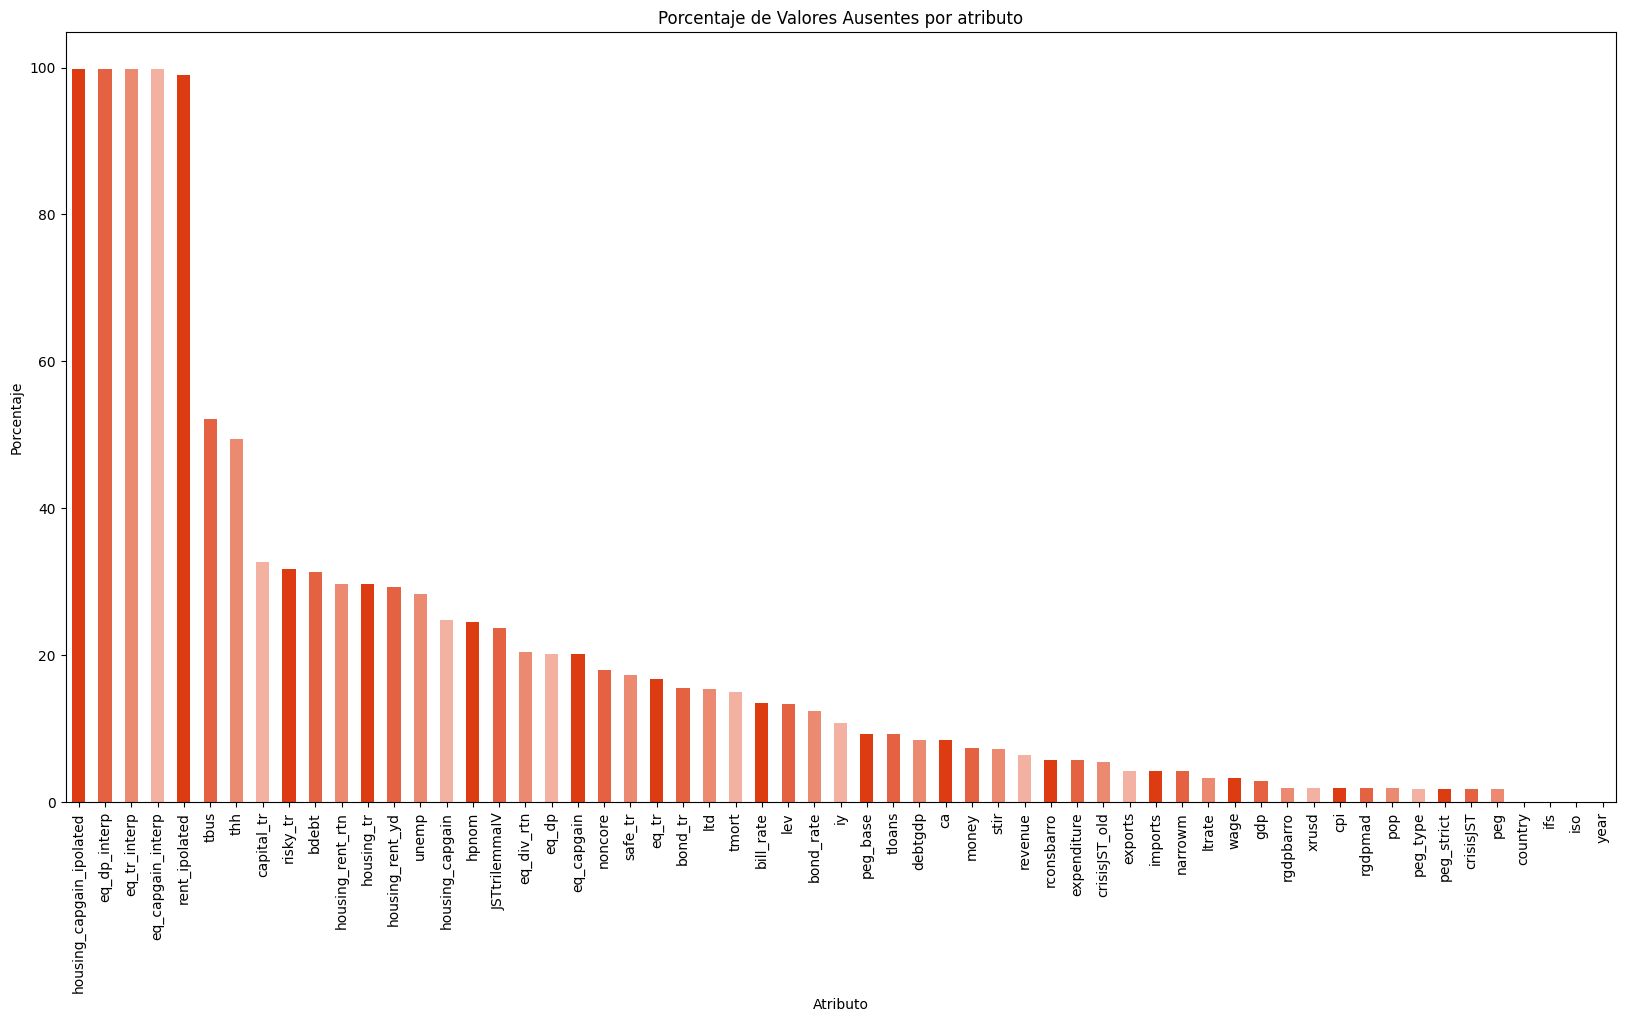

In [5]:
# Establecemos la paleta de colores de VIU
viu_colors = ['#dd3c12', '#e46242', '#ec8a71', '#f3b1a1',
              '#dd3c12', '#e46242', '#ec8a71', '#f3b1a1',
              '#dd3c12', '#e46242', '#ec8a71']

etiquetas = ['No Crisis', 'Crisis']

porcentaje.plot(kind="bar", figsize=(20,10), color=viu_colors).set(title='Porcentaje de Valores Ausentes por atributo')
plt.xlabel('Atributo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.savefig('../app/graficas/comprension_bruto_ausentes_atributo.png', bbox_inches='tight')
plt.show()

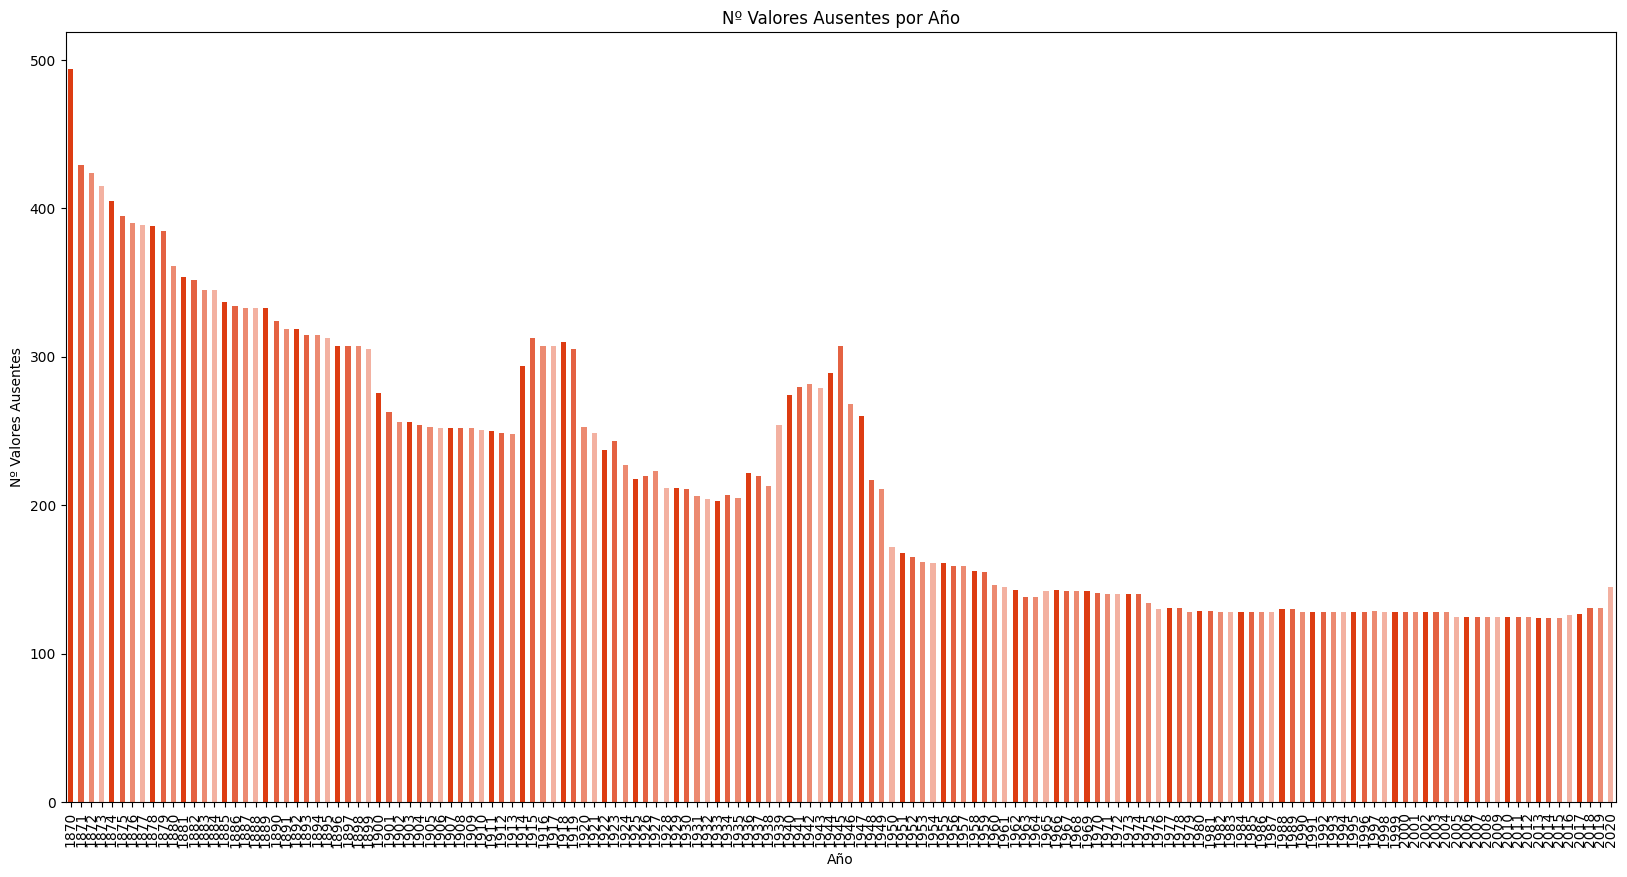

In [6]:
agrupacion = data.groupby('year').apply(lambda x: (x.isnull().sum(axis=1)).sum())

agrupacion.plot(kind="bar", stacked=True, rot=90, figsize=(20,10), xlabel='Año', title='Nº Valores Ausentes por Año',
             color=viu_colors)
plt.ylabel('Nº Valores Ausentes')
plt.savefig('../app/graficas/comprension_bruto_ausentes_anio.png', bbox_inches='tight')
plt.show()

Como se puede observar hay atributos con un número elevado de valores ausentes. Antes de continuar y para ver si todas las instancias del dataset serán útiles, vamos a revisar la distribución temporal de dichos valores ausentes.

Estableceremos como primer criterio de filtrado, que únicamente se utilizará la información correspondiente a las instancias con un número total de valores ausentes inferior al 25% del total del número de atributos. De manera adicional, se usará únicamente la serie temporal contigua con un número de instancias útiles superior también al 25% del número total de países por año, es decir, sólo se usarán los años contiguos en los que todos garanticen los dos criterios anteriores:

In [7]:
# Obtenemos el número de muestras de países por año para el primer criterio
# (número total de valores ausentes inferior al 30%)

th_atributos = data.shape[1]*30/100
datos_agrupados = data.groupby('year').apply(lambda x: (x.isnull().sum(axis=1) > th_atributos).sum())
print(pd.Series(datos_agrupados, name='Muestras Inválidas'))

# Calculamos la serie de años final que cumple tanto el primer criterio como el segundo:
th_anios = len(np.unique(data["iso"]))*30/100
ultimo_anio_no_util = datos_agrupados[::-1].gt(th_anios).idxmax()
print(f'Años útiles: {np.unique(data[data["year"]>ultimo_anio_no_util]["year"])}')

year
1870    18
1871    13
1872    14
1873    14
1874    14
1875    13
1876    13
1877    13
1878    13
1879    13
1880    11
1881    11
1882    11
1883    11
1884    11
1885    10
1886    10
1887    10
1888    10
1889    10
1890     9
1891     9
1892     9
1893     8
1894     8
1895     8
1896     8
1897     8
1898     8
1899     8
1900     4
1901     4
1902     4
1903     4
1904     4
1905     4
1906     4
1907     4
1908     4
1909     4
1910     4
1911     4
1912     4
1913     3
1914     4
1915     7
1916     7
1917     7
1918     7
1919     7
1920     4
1921     4
1922     3
1923     3
1924     3
1925     2
1926     2
1927     2
1928     2
1929     2
1930     2
1931     2
1932     2
1933     2
1934     2
1935     2
1936     3
1937     3
1938     3
1939     4
1940     5
1941     4
1942     5
1943     5
1944     5
1945     7
1946     5
1947     5
1948     3
1949     3
1950     2
1951     2
1952     2
1953     2
1954     2
1955     2
1956     2
1957     2
1958     2
1959     2
1960 

Eliminamos las instancias no útiles y revisamos las volumetrías finales:

In [8]:
data.drop(data[data['year'] <= ultimo_anio_no_util-retraso].index, inplace=True)
data = data.reset_index(drop=True)

In [9]:
# Revisamos el número de instancias y atributos
print(f'\n\nVolumetría de datos:\nNúmero de Instancias: {data.shape[0]}\nNúmero de Atributos: {data.shape[1]-1}\n\n')
# Revisamos el número total de países
print(f'Número Total de Países: {len(np.unique(data["iso"]))}')

# Revisamos el número total de años y sus valores
print(f'Número Total de Años: {len(np.unique(data["year"]))}')
print(f'{np.unique(data["year"])}\n\n')

clases, ocurrencias = np.unique(data['crisisJST'], return_counts=True)
porcentajes = np.round(ocurrencias / data.shape[0] * 100, 2)
print(f'Clases: {clases}\nEtiquetas {etiquetas}\nOcurrencias: {ocurrencias}\nPorcentajes {porcentajes}')




Volumetría de datos:
Número de Instancias: 1386
Número de Atributos: 58


Número Total de Países: 18
Número Total de Años: 77
[1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


Clases: [0. 1.]
Etiquetas ['No Crisis', 'Crisis']
Ocurrencias: [1361   25]
Porcentajes [98.2  1.8]


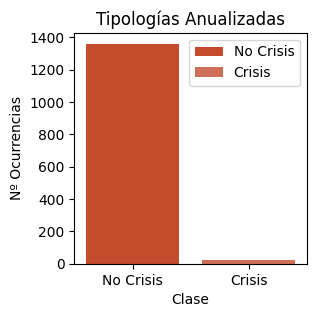

In [10]:
fig,ax = plt.subplots(figsize=(3,3))
ax = sns.countplot(data, x='crisisJST', palette=sns.color_palette(viu_colors,2)).set(title='Tipologías Anualizadas')
plt.xlabel('Clase')
plt.ylabel('Nº Ocurrencias')
plt.xticks(ticks=[0,1],labels=etiquetas)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_bruto_instancias_clase.png', bbox_inches='tight')
plt.show()

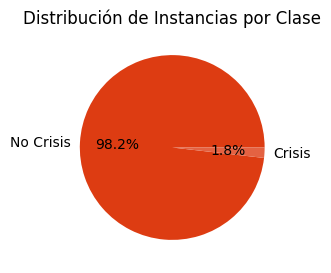

In [11]:
fig,ax = plt.subplots(figsize=(3,3))
aggregates = data['crisisJST'].value_counts()
plt.pie(aggregates, labels = etiquetas, colors=sns.color_palette(viu_colors, 2), autopct='%.1f%%')
plt.title('Distribución de Instancias por Clase')
plt.savefig('../app/graficas/comprension_bruto_porcentaje_clase.png', bbox_inches='tight')
plt.show()

## Conclusiones Previas
Como puntos a descatar sobre nuestro dataset:
* Existe un acusado desbalance de instancias asociadas a cada clase
* El volumen de valores ausentes era elevado en algunos atributos y hemos tenido que realizar un primer filtrado de datos brutos útiles.
* Debemos trabajar con datos asociados a series temporales.

# 2.- Preparación de Dataset
A partir de los datos anteriores se procede a la elaboración de los siguientes nuevos atributos que serán los finalmente usados como base para el proceso de entrenamiento:
+ Diferencial relativo del Índice de Precios al Consumo.
+ Diferencial absoluto del Agregado Monetario Amplio (M3) escalado por el Producto Interior Bruto del país.
+ Diferencial relativo del Consumo Real per Cápita.
+ Diferencial absoluto del volumen de Deuda Pública escalado por el Producto Interior Bruto.
+ Diferencial absoluto del volumen de Inversión escalado por el Producto Interior Bruto.
+ Diferencial absoluto del estado de Cuenta Corriente del país escalado por el Producto Interior Bruto.
+ Diferencial absoluto del Volumen de Crédito al sector privado escalado por el Producto Interior Bruto.
+ Diferencial absoluto del ratio Volumen de Crédito al sector privado - Tipo de Interés a largo plazo.
+ Aumento de Crédito Global.
+ Curva de Rendimiento Global (Global Yield Curve).
+ Ratio Tipos de Interes a Largo Plazo vs Corto Plazo.

In [12]:
# Funciones auxiliares

def crear_atributos_escalados_pib(data, atributos):
    # Escalamos los atributos de entrada dividiendo su valor por el 'Gross Domestic Product'
    atributos_escalados = []
    for atributo in atributos:
        nombre = f'{atributo}_pib'
        data[nombre] = data[atributo] / data['gdp']
        atributos_escalados.append(nombre)
    return data, atributos_escalados


def calcula_atributos_diferenciales(data, atributos, tipo, retraso=2):
    # Variables calculadas como el diferencial absoluto o porcentual entre el 
    # valor actual de la variable y el asociado 'retraso' años atrás
    for atributo in atributos:
        if tipo == 'absoluto': # Diferencial Absoluto
            nombre = f'{atributo}_dif_abs{retraso}'
            data[nombre] = data.groupby('iso', group_keys=False)[atributo].diff(retraso)
        else: # Diferencial Porcentual
            nombre = f'{atributo}_dif_por{retraso}'
            data[nombre] = data.groupby('iso', group_keys=False)[atributo].apply(lambda x: cambio_relativo_historico(x, retraso))
    return data


def cambio_relativo_historico(atributo, retraso):
    # Calcula el cambio relativo para un atributo entre dos fechas 
    atributo_historico = np.array(atributo.shift(retraso))
    return (atributo - atributo_historico) / atributo_historico


def marca_pre_post_crisis(data):
    # Buscamos los años de crisis
    posiciones = data[data['crisisJST'] == 1].index
    data[data['crisisJST'] == 1].to_csv('../datasets/finales/test3.csv', sep=';', na_rep='', decimal=',', index=False)
    aux = data['crisisJST'].copy()
    for posicion in posiciones:
        # Cambiamos la clase de las intancias de crisis para borrarlas posteriormente
        aux[posicion] = 2

        # Marcamos las instancias post-crisis (importante comprobar límites de dataframe y que se mantiene
        # el mismo país)
        for j in range(posicion + 1, posicion + tiempo_recesion + 1):
            if not j >= data.shape[0]:
                if data['iso'][j] == data['iso'][posicion]:
                    aux[j] = 2
        # Marcamos las instancias pre-crisis (importante comprobar límites de dataframe y que se mantiene
        # el mismo país)
        for j in range(posicion - 1, posicion - tiempo_prediccion - 1, -1):
            if not j < 0:
                if data['iso'][j] == data['iso'][posicion]:
                    aux[j] = 1
    data['crisisJST'] = aux
    return data

def aumento_credito_global(data):
    for year in data['year'].unique():
        for country in data['iso'].unique():
                # El calculo se realiza para cada año teniendo en cuenta todos
                # los países menos el actual
            perc_pos = data.loc[(data['year']==year) & (data.iso != country), 'tloans_pib_dif_abs' + str(retraso)].mean()
            if not np.isnan(perc_pos):
                data.loc[(data['year']==year) & (data.iso == country), 'global_loan' + str(retraso)] = perc_pos
    return data


def pendiente_curva_yield_global(data):
    for year in data["year"].unique():
        for country in data["iso"].unique():
                # El calculo se realiza para cada año teniendo en cuenta todos
                # los países menos el actual
            perc_pos = data.loc[(data['year']==year) & (data.iso != country), "drate"].mean()
            if not np.isnan(perc_pos):
                data.loc[(data['year']==year) & (data.iso == country), "global_drate"] = perc_pos
    return data


def crear_dataset(df):
    # Creación del dataset de trabajo a partir de los datos en bruto
    data = df.copy()

    # Cálculo de atributos finales
    data.loc[:, 'drate'] = data['ltrate'] - data['stir']  # Rate Diferencial
    data.loc[:, 'pdebt'] = data['debtgdp'] * data['gdp']  # Deuda Pública neta
    data.loc[:, 'inv'] = data['iy'] * data['gdp']         # Inversión neta
    data.loc[:, 'tdbtserv'] = data['tloans'] * data['ltrate'] / 100.0    # Ratio Volumen de Crédito al sector privado - Tipo de Interés a largo plazo

        # Atributos a escalar por el PIB del país (GDP)
    atributos_escalar = ['money', 'narrowm', 'tloans', 'tbus',
                          'thh', 'tmort', 'ca', 'cpi', 'tdbtserv',
                          'inv', 'pdebt']
    
    data, atributos_escalados_pib = crear_atributos_escalados_pib(data, atributos_escalar)
    
        # Atributos calculados por diferenciales entre años

            # Diferencias absolutas    
    data = calcula_atributos_diferenciales(data, ['ltrate', 'stir', 'drate'] + atributos_escalados_pib, 'absoluto', retraso)

            # Diferencias relativas
    data = calcula_atributos_diferenciales(data, ['hpnom', 'rconsbarro', 'gdp'] + atributos_escalar, 'porcentaje', retraso=retraso)
    
        # Atributos calculados mediante indicadores globales

    data = aumento_credito_global(data)
    
    data = pendiente_curva_yield_global(data)

    # Marcado de años precrisis, post-crisis
    
    data = marca_pre_post_crisis(data)
    
    # Nos quedamos sólo con las columnas necesarias
    atributos_finales = ['cpi_dif_por2', 'money_pib_dif_abs2', 'rconsbarro_dif_por2',
                         'pdebt_pib_dif_abs2', 'inv_pib_dif_abs2', 'ca_pib_dif_abs2',
                         'tloans_pib_dif_abs2', 'tdbtserv_pib_dif_abs2', 'global_loan2',
                         'global_drate', 'drate']

    data = pd.concat([data.loc[:, atributos_finales], data['year'], data['iso'], data['crisisJST']], axis=1)

    # Eliminamos los años de crisis y post-crisis para evitar sesgo en los datos
    data.drop(data[data.crisisJST == 2].index, inplace=True)

    data.drop(data[data['year'] <= ultimo_anio_no_util].index, inplace=True)
    
    # Ordenamos el dataset por año y país para facilitar posteriormente el particionado
    # evitando el leak de datos temporales entre entrenamiento y test
    data.sort_values(by=['year', 'iso'], inplace=True)
        
    data = data.reset_index(drop=True)  # update index
    return data

In [13]:
# Creamos el dataset de trabajo
data = crear_dataset(data)
print(data['year'].unique())

[1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


# Análisis de datos
Vamos a revisar las características del dataset de trabajo final

In [14]:
# Revisamos la tipología de los datos
print('Tipología de atributos:')
display(data.dtypes)

# Revisamos las características de los mismos
print('\n\nCaracteristicas de atributos:')
display(data.describe(include='all'))
display(data.info(show_counts=True))

# Revisamos el número de instancias y atributos
print(f'\n\nVolumetría de datos:\nNúmero de Instancias: {data.shape[0]}\nNúmero de Atributos: {data.shape[1]-1}\n\n')
# Revisamos el número total de países
print(f'Número Total de Países: {len(np.unique(data["iso"]))}')

# Revisamos el número total de años y sus valores
print(f'Número Total de Años: {len(np.unique(data["year"]))}')
print(f'{np.unique(data["year"])}\n\n')

# Mostramos una muestra de los registros
print('Muestra de datos:')
display(data.sample(5))

Tipología de atributos:


cpi_dif_por2             float64
money_pib_dif_abs2       float64
rconsbarro_dif_por2      float64
pdebt_pib_dif_abs2       float64
inv_pib_dif_abs2         float64
ca_pib_dif_abs2          float64
tloans_pib_dif_abs2      float64
tdbtserv_pib_dif_abs2    float64
global_loan2             float64
global_drate             float64
drate                    float64
year                       int64
iso                       object
crisisJST                float64
dtype: object



Caracteristicas de atributos:


cpi_dif_por2  money_pib_dif_abs2  rconsbarro_dif_por2  \
count    1225.000000         1182.000000          1224.000000   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean        0.120870            0.005304             0.056699   
std         0.583643            0.083878             0.069433   
min        -0.323187           -1.244216            -0.143871   
25%         0.033190           -0.019663             0.021311   
50%         0.062032            0.010291             0.046839   
75%         0.126181            0.036348             0.076857   
max        19.512812            0.263566             1.035081   

        pdebt_pib_dif_abs2  inv_pib_dif_abs2  ca_pib_dif_abs2  \
count          1187.000000       1194.000000      1200.000000   
unique                 NaN               NaN              NaN   
top                    NaN               NaN              NaN   
freq                   NaN               NaN              NaN   
mean             -0.007916          0.004548        -0.000096   
std               0.097161          0.024781         0.029005   
min              -1.479744         -0.101976        -0.221712   
25%              -0.039654         -0.008600        -0.013579   
50%              -0.007798          0.004441         0.000096   
75%               0.031367          0.014377         0.012704   
max               0.691630          0.200316         0.160864   

        tloans_pib_dif_abs2  tdbtserv_pib_dif_abs2  global_loan2  \
count           1202.000000            1195.000000   1225.000000   
unique                  NaN                    NaN           NaN   
top                     NaN                    NaN           NaN   
freq                    NaN                    NaN           NaN   
mean               0.021741              -0.000154      0.019978   
std                0.067701               0.012011      0.030871   
min               -0.514636              -0.104432     -0.068503   
25%               -0.008389              -0.004614      0.005701   
50%                0.019719               0.000880      0.017517   
75%                0.051409               0.005102      0.035718   
max                0.402512               0.051406      0.115063   

        global_drate        drate         year   iso    crisisJST  
count    1225.000000  1205.000000  1225.000000  1225  1225.000000  
unique           NaN          NaN          NaN    18          NaN  
top              NaN          NaN          NaN   CAN          NaN  
freq             NaN          NaN          NaN    75          NaN  
mean        1.149752     1.117775  1981.257143   NaN     0.040816  
std         0.741956     1.653544    21.713261   NaN     0.197945  
min        -1.133801    -6.012500  1946.000000   NaN     0.000000  
25%         0.606955     0.321666  1963.000000   NaN     0.000000  
50%         1.230511     1.130000  1980.000000   NaN     0.000000  
75%         1.705024     1.880000  2000.000000   NaN     0.000000  
max         3.304801    14.150000  2020.000000   NaN     1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cpi_dif_por2           1225 non-null   float64
 1   money_pib_dif_abs2     1182 non-null   float64
 2   rconsbarro_dif_por2    1224 non-null   float64
 3   pdebt_pib_dif_abs2     1187 non-null   float64
 4   inv_pib_dif_abs2       1194 non-null   float64
 5   ca_pib_dif_abs2        1200 non-null   float64
 6   tloans_pib_dif_abs2    1202 non-null   float64
 7   tdbtserv_pib_dif_abs2  1195 non-null   float64
 8   global_loan2           1225 non-null   float64
 9   global_drate           1225 non-null   float64
 10  drate                  1205 non-null   float64
 11  year                   1225 non-null   int64  
 12  iso                    1225 non-null   object 
 13  crisisJST              1225 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 134.1+

None



Volumetría de datos:
Número de Instancias: 1225
Número de Atributos: 13


Número Total de Países: 18
Número Total de Años: 75
[1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


Muestra de datos:


cpi_dif_por2  money_pib_dif_abs2  rconsbarro_dif_por2  \
801      0.064157            0.035320             0.025593   
966      0.058626            0.038239             0.068810   
381      0.089897           -0.007212             0.039842   
253      0.015291                 NaN             0.091498   
293      0.110841           -0.016313             0.072296   

     pdebt_pib_dif_abs2  inv_pib_dif_abs2  ca_pib_dif_abs2  \
801           -0.020270         -0.049928         0.021055   
966           -0.039690          0.035572        -0.031000   
381            0.005398         -0.026487         0.018823   
253            0.029234          0.024031        -0.030261   
293           -0.048108          0.012314        -0.022394   

     tloans_pib_dif_abs2  tdbtserv_pib_dif_abs2  global_loan2  global_drate  \
801             0.006451              -0.005082     -0.003558     -0.264875   
966             0.158564               0.006561      0.033867      1.821671   
381             0.035200               0.007748      0.019275      1.403692   
253             0.036066               0.001737      0.041841      1.476651   
293             0.006651               0.004622      0.029229      1.506086   

        drate  year  iso  crisisJST  
801 -4.852105  1992  IRL        0.0  
966  0.557609  2003  AUS        0.0  
381  1.610000  1967  CHE        0.0  
253  1.070000  1960  BEL        0.0  
293 -0.680000  1962  DNK        0.0

In [15]:
etiquetas = ['No Crisis', 'Pre-Crisis']

# Revisamos el número de instancias y atributos
print(f'\n\nVolumetría de datos:\nNúmero de Instancias: {data.shape[0]}\nNúmero de Atributos: {data.shape[1]-1}\n\n')
# Revisamos el número total de países
print(f'Número Total de Países: {len(np.unique(data["iso"]))}')

# Revisamos el número total de años y sus valores
print(f'Número Total de Años: {len(np.unique(data["year"]))}')
print(f'{np.unique(data["year"])}\n\n')

clases, ocurrencias = np.unique(data['crisisJST'], return_counts=True)
porcentajes = np.round(ocurrencias / data.shape[0] * 100, 2)
print(f'Clases: {clases}\nEtiquetas {etiquetas}\nOcurrencias: {ocurrencias}\nPorcentajes {porcentajes}')



Volumetría de datos:
Número de Instancias: 1225
Número de Atributos: 13


Número Total de Países: 18
Número Total de Años: 75
[1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


Clases: [0. 1.]
Etiquetas ['No Crisis', 'Pre-Crisis']
Ocurrencias: [1175   50]
Porcentajes [95.92  4.08]


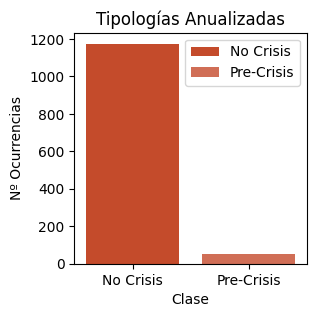

In [16]:
fig,ax = plt.subplots(figsize=(3,3))
ax = sns.countplot(data, x='crisisJST', palette=sns.color_palette(viu_colors,2)).set(title='Tipologías Anualizadas')
plt.xlabel('Clase')
plt.ylabel('Nº Ocurrencias')
plt.xticks(ticks=[0,1],labels=etiquetas)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_final_instancias_clase.png', bbox_inches='tight')
plt.show()

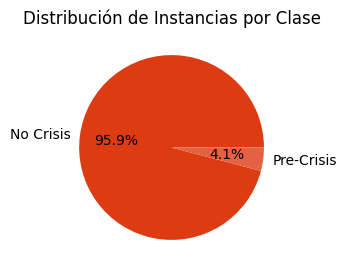

In [17]:
fig,ax = plt.subplots(figsize=(3,3))
aggregates = data['crisisJST'].value_counts()
plt.pie(aggregates, labels = etiquetas, colors=sns.color_palette(viu_colors, 2), autopct='%.1f%%')
plt.title('Distribución de Instancias por Clase')
plt.savefig('../app/graficas/comprension_final_porcentaje_clase.png', bbox_inches='tight')
plt.show()

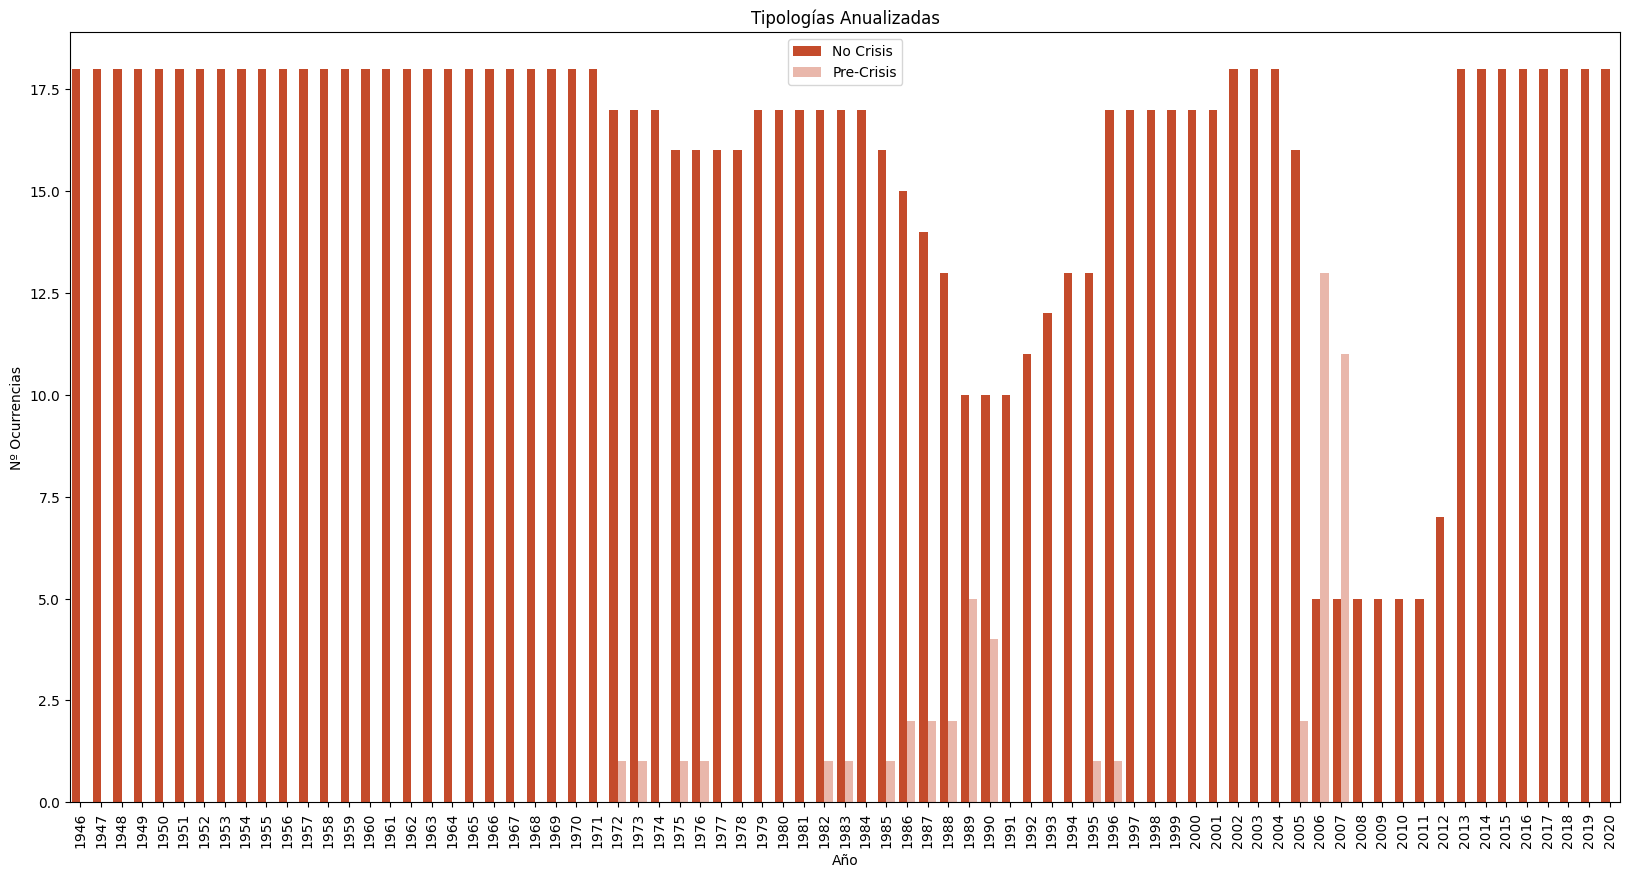

In [18]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data[['year', 'crisisJST']], x='year', hue='crisisJST', palette=sns.color_palette(['#dd3c12', '#f3b1a1'])).set(title='Tipologías Anualizadas')
plt.xlabel('Año')
plt.ylabel('Nº Ocurrencias')
plt.xticks(rotation=90)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_final_tipologias_anualizadas.png', bbox_inches='tight')
plt.show()

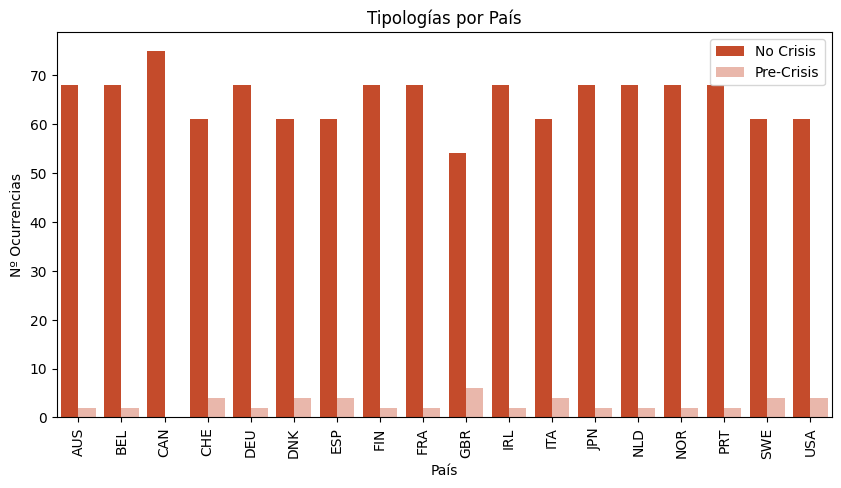

In [19]:
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data[['iso', 'crisisJST']], x='iso', hue='crisisJST', palette=sns.color_palette(['#dd3c12', '#f3b1a1'])).set(title='Tipologías por País')
plt.xlabel('País')
plt.ylabel('Nº Ocurrencias')
plt.xticks(rotation=90)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_final_tipologias_pais.png', bbox_inches='tight')
plt.show()

In [20]:
# Revisamos la distribución de los valores ausentes
num_ausentes = data.isna().sum()
porcentaje = round(num_ausentes / data.shape[0] * 100, 2)
porcentaje.sort_values(ascending=False, inplace=True)
porcentaje_med = round(np.sum(porcentaje) / porcentaje.shape[0], 2)
print(f'Porcentaje Medio de Valores Ausentes: {porcentaje_med}%\n')
print('Porcentaje de Valores Ausentes por Columna')
print(porcentaje)

Porcentaje Medio de Valores Ausentes: 1.23%

Porcentaje de Valores Ausentes por Columna
money_pib_dif_abs2       3.51
pdebt_pib_dif_abs2       3.10
inv_pib_dif_abs2         2.53
tdbtserv_pib_dif_abs2    2.45
ca_pib_dif_abs2          2.04
tloans_pib_dif_abs2      1.88
drate                    1.63
rconsbarro_dif_por2      0.08
cpi_dif_por2             0.00
global_loan2             0.00
global_drate             0.00
year                     0.00
iso                      0.00
crisisJST                0.00
dtype: float64


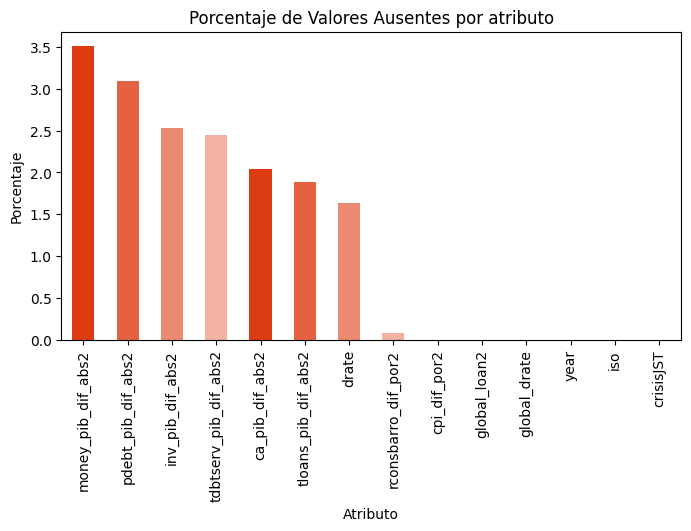

In [21]:
porcentaje.plot(kind="bar", figsize=(8,4), color=viu_colors).set(title='Porcentaje de Valores Ausentes por atributo')
plt.xlabel('Atributo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.savefig('../app/graficas/comprension_final_porcentaje_ausentes_atributo.png', bbox_inches='tight')
plt.show()

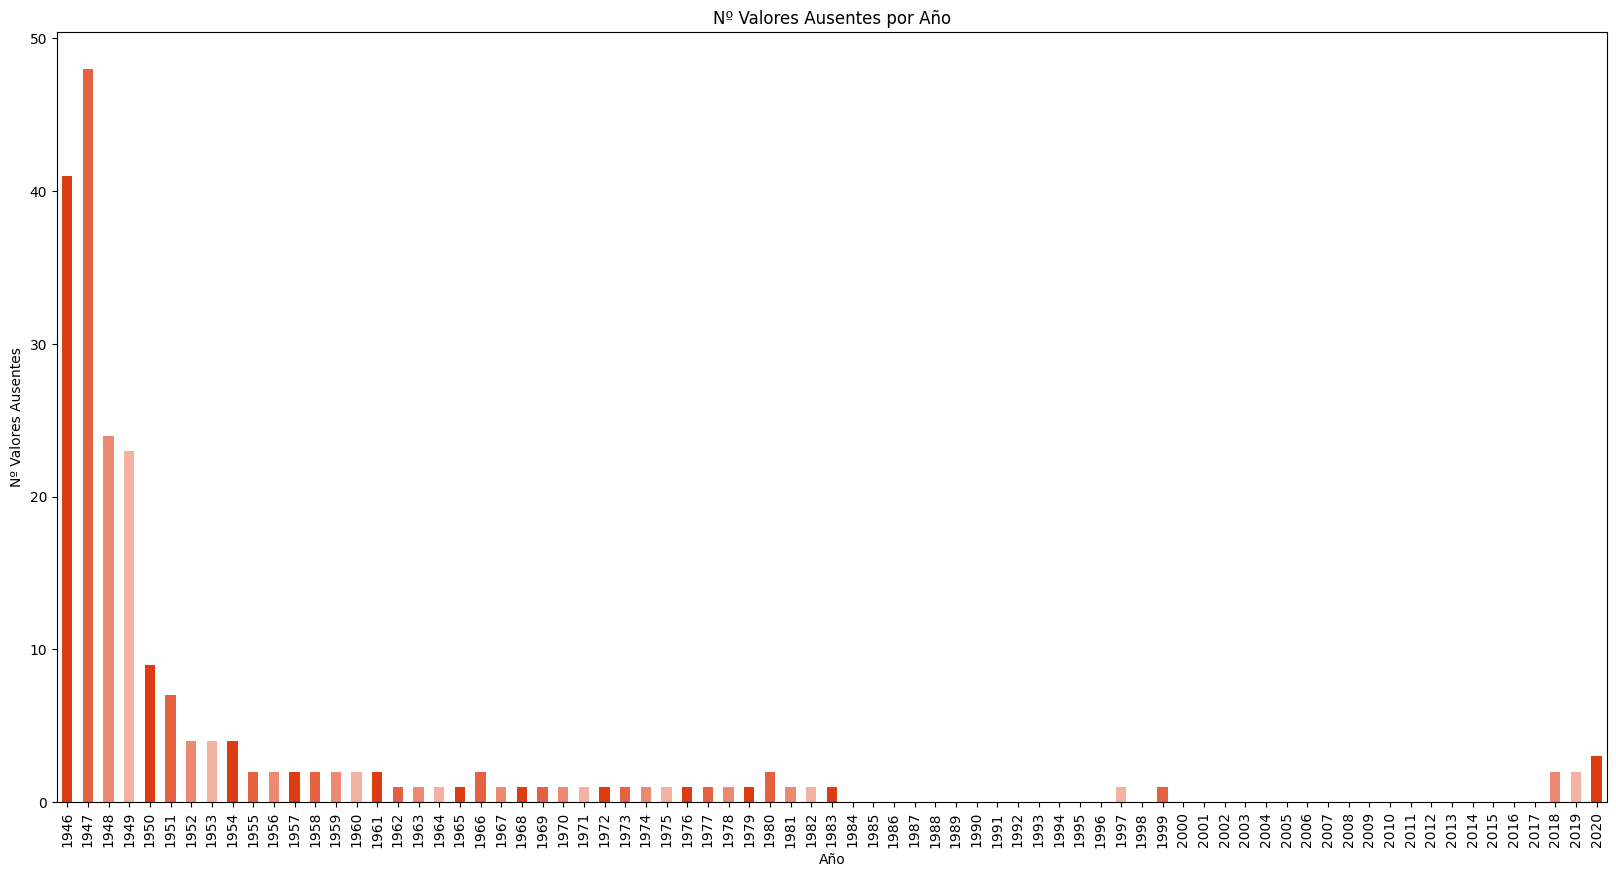

In [22]:
agrupacion = data.groupby('year').apply(lambda x: (x.isnull().sum(axis=1)).sum())

agrupacion.plot(kind="bar", stacked=True, rot=90, figsize=(20,10), xlabel='Año', title='Nº Valores Ausentes por Año',
             color=viu_colors)
plt.ylabel('Nº Valores Ausentes')
plt.savefig('../app/graficas/comprension_final_ausentes_anio.png', bbox_inches='tight')
plt.show()

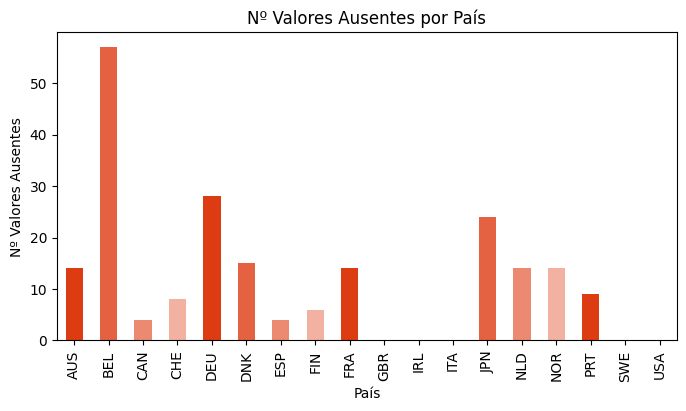

In [23]:
agrupacion = data.groupby('iso').apply(lambda x: (x.isnull().sum(axis=1)).sum())

agrupacion.plot(kind="bar", stacked=True, rot=90, figsize=(8,4), xlabel='País', title='Nº Valores Ausentes por País',
             color=viu_colors)
plt.ylabel('Nº Valores Ausentes')
plt.savefig('../app/graficas/comprension_final_ausentes_pais.png', bbox_inches='tight')
plt.show()

# Distribución de valores de atributos por país

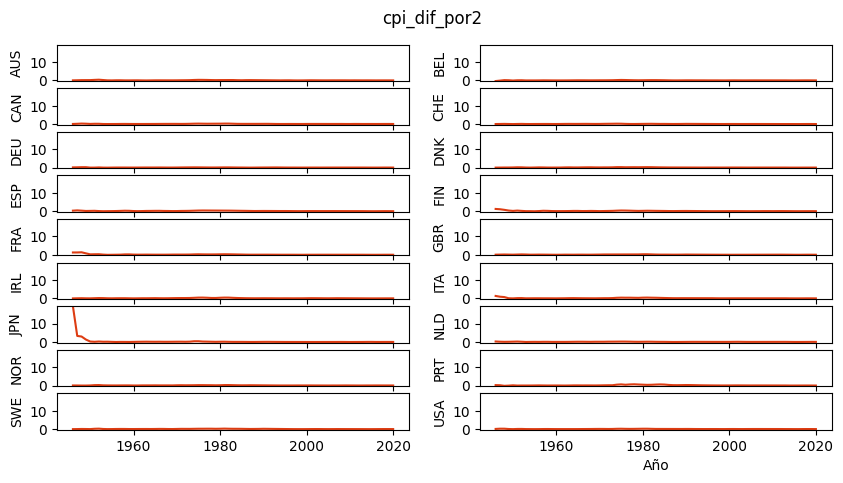

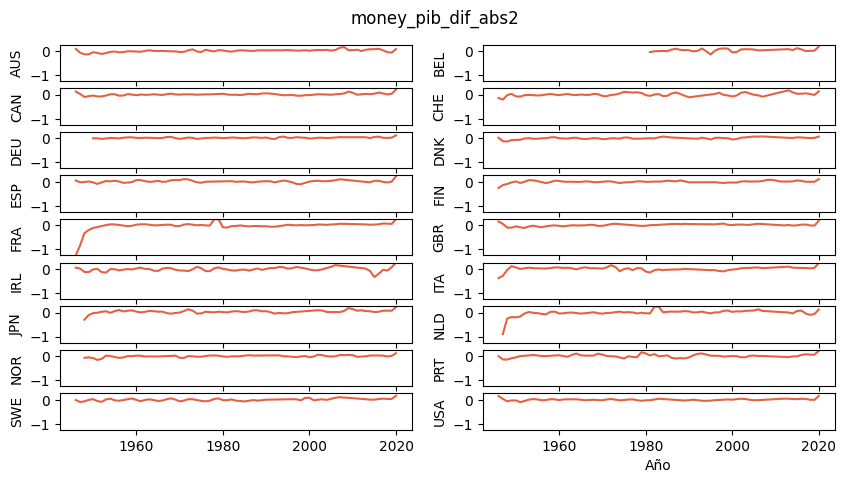

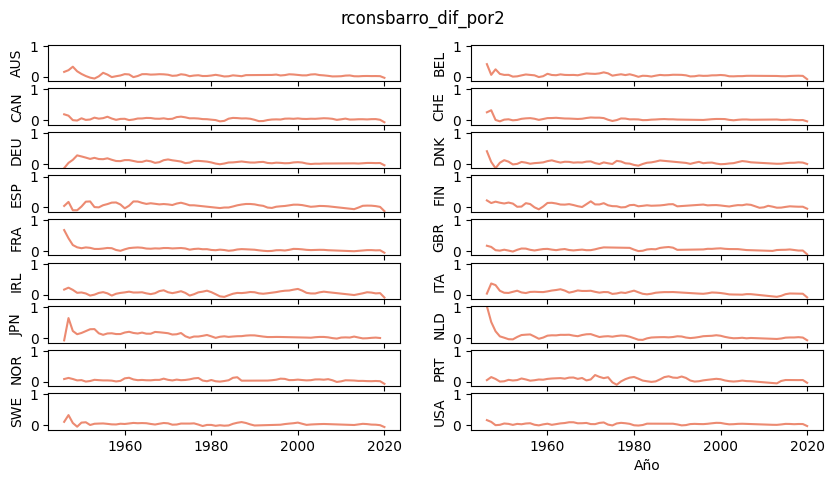

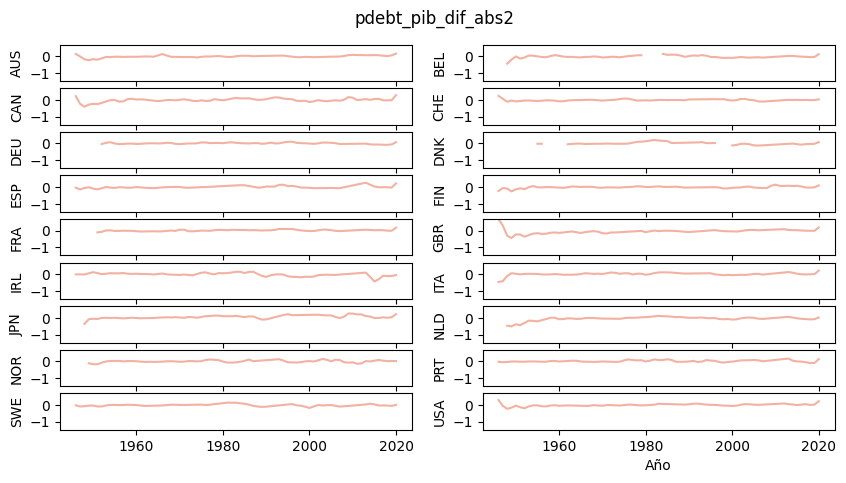

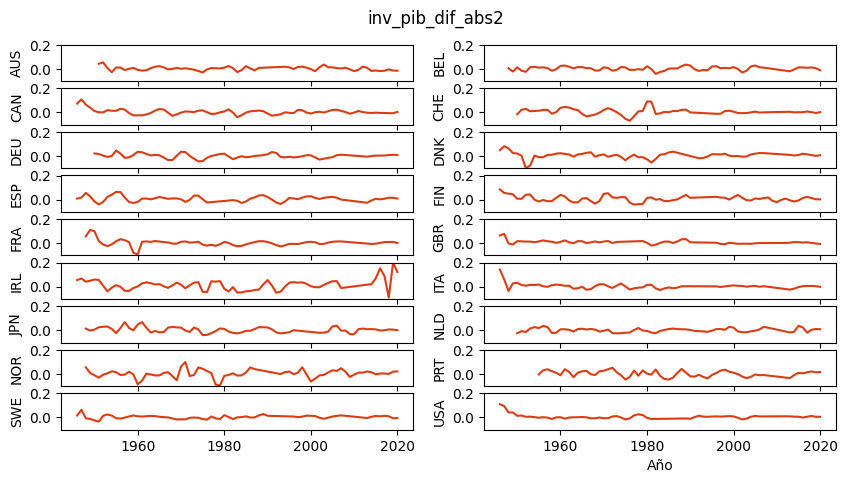

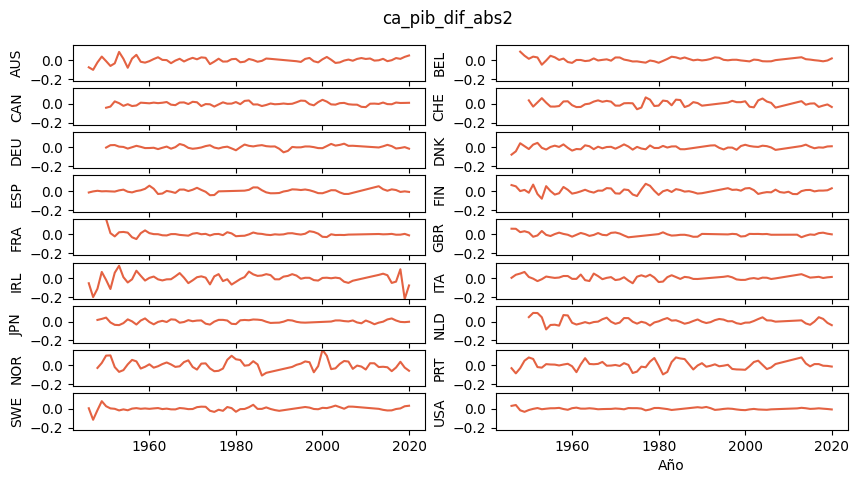

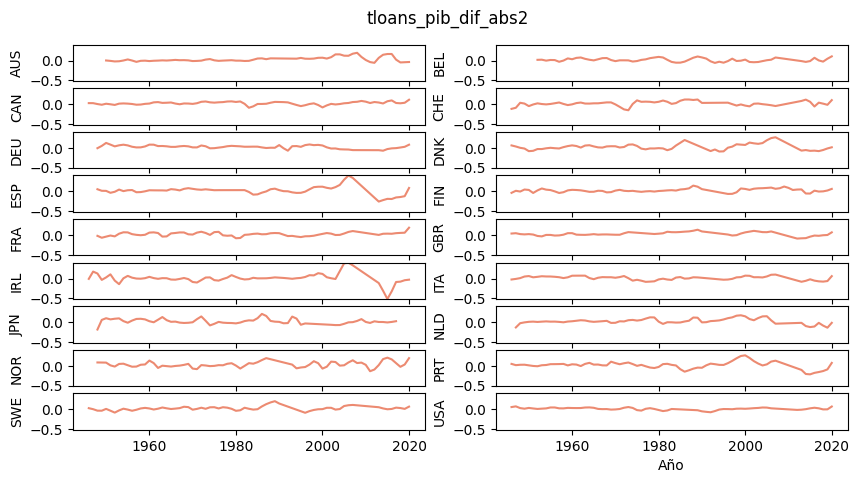

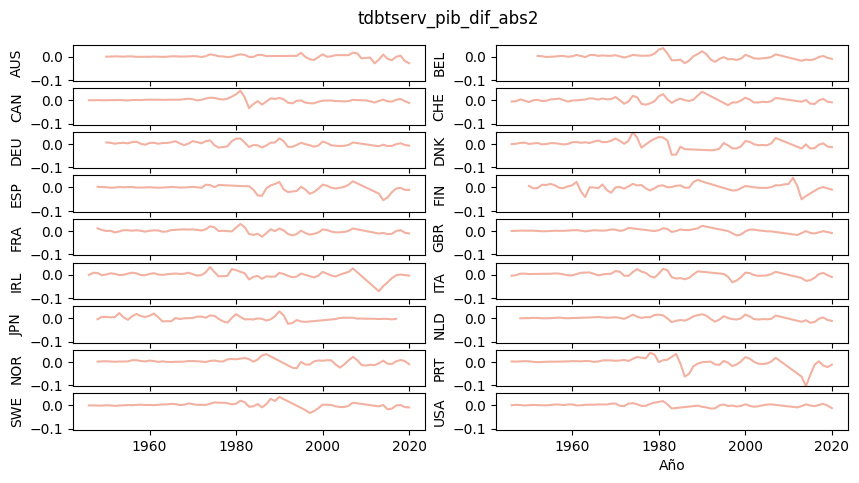

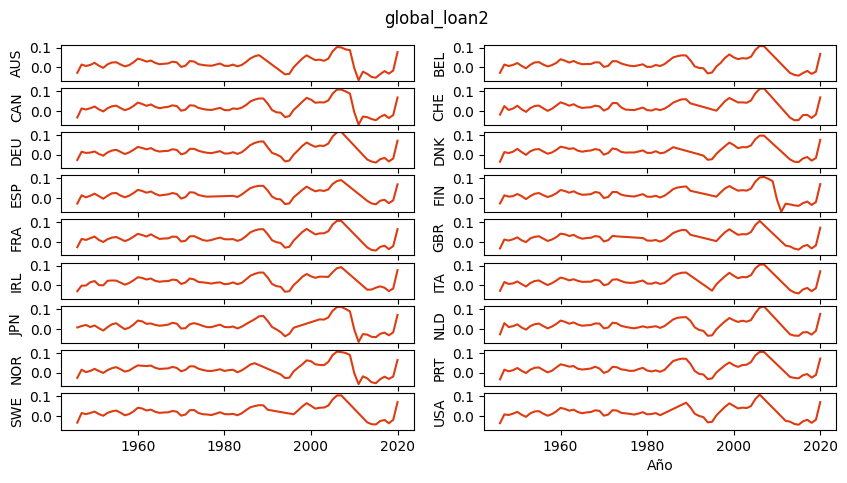

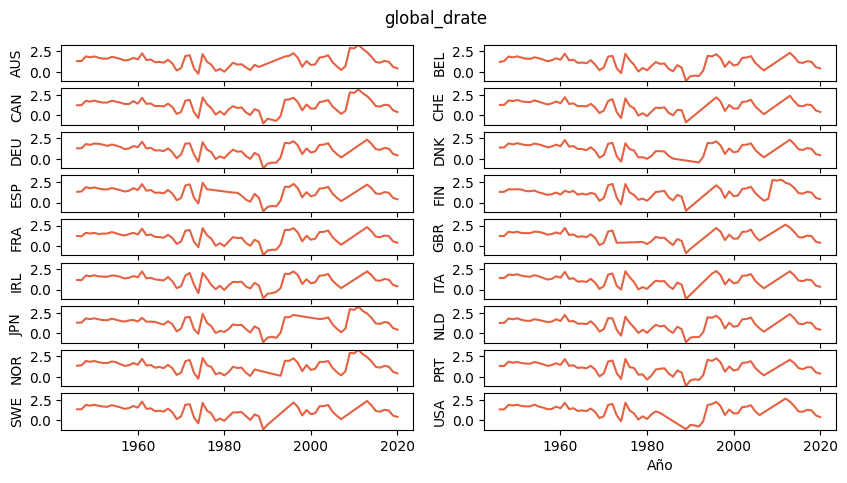

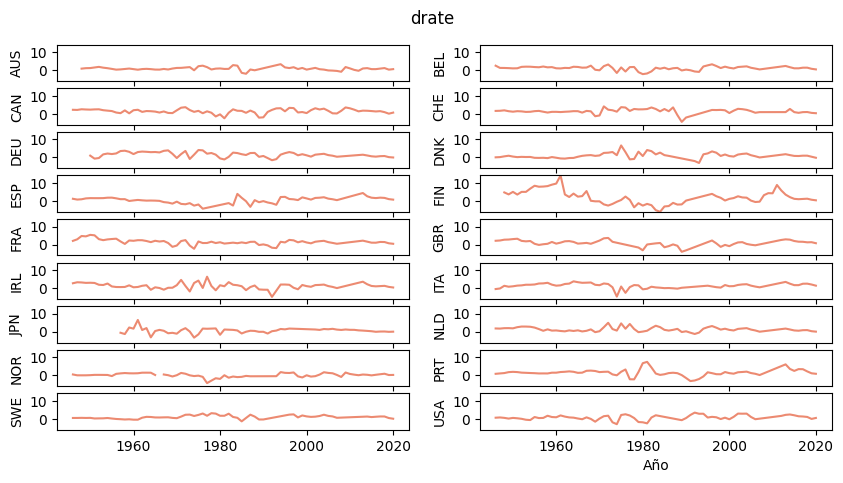

In [24]:
isos = list(data['iso'].unique())
columnas = data.columns

for i in range(data.shape[1]-3):
    fig, ax = plt.subplots(int(len(isos)/2), 2, sharex=True, figsize=(10, 5))
    contador = 0
    for j in range(int(len(isos)/2)):
        for k in range(2):
                ax[j,k].plot(data[data['iso'] == isos[contador]]['year'], data[data['iso'] == isos[contador]][columnas[i]], label=isos[contador], color=viu_colors[i]) 
                ax[j,k].set_ylabel(isos[contador], rotation=90)
                ax[j,k].set_ylim(data[columnas[i]].min(), data[columnas[i]].max())
                contador += 1
    
    plt.xlabel('Año')
    plt.suptitle(columnas[i], y=0.95)
    plt.savefig('../app/graficas/comprension_final_valores_atributos_pais_' + str(i) + '.png', bbox_inches='tight')
    plt.show()
    

# Distribución de valores de atributos por clase

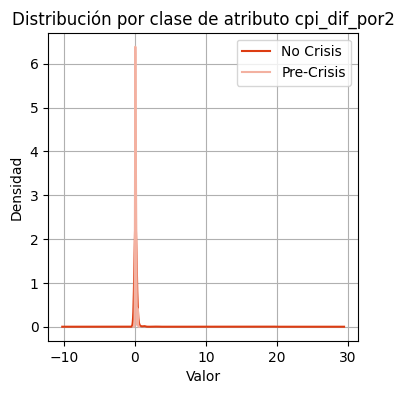

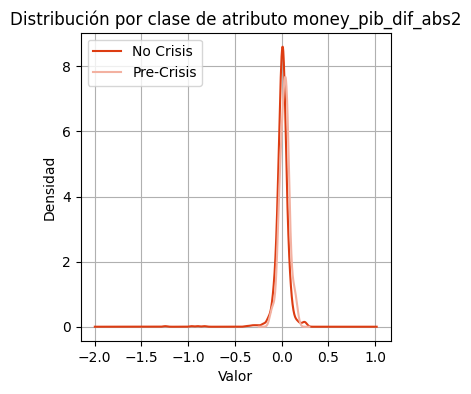

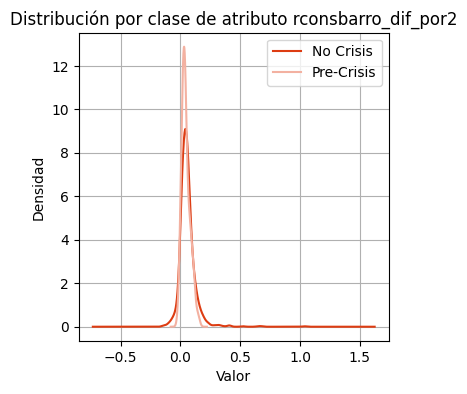

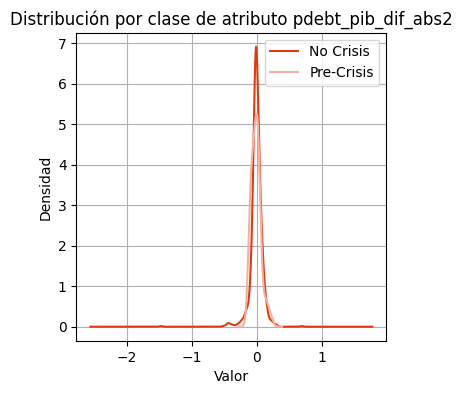

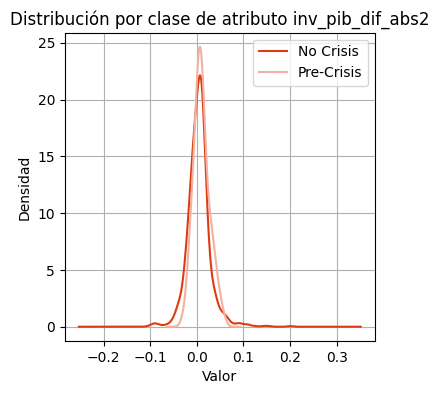

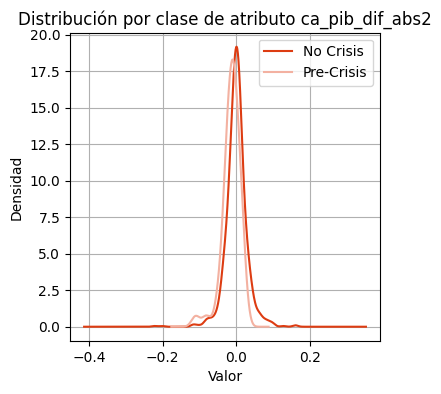

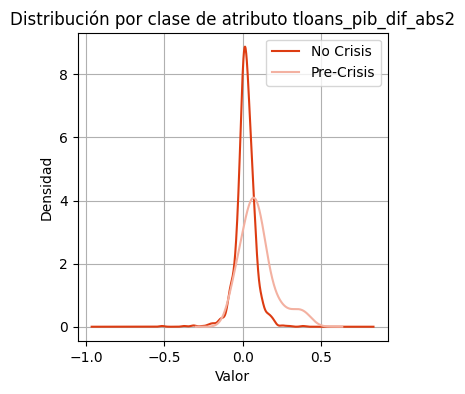

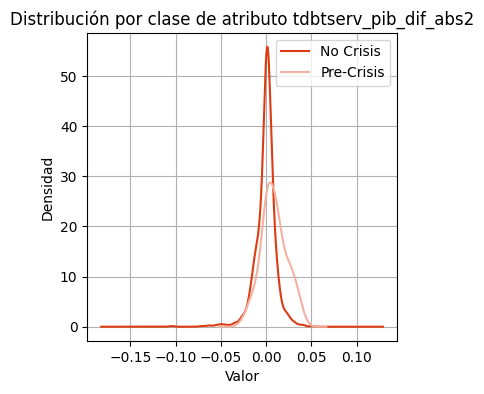

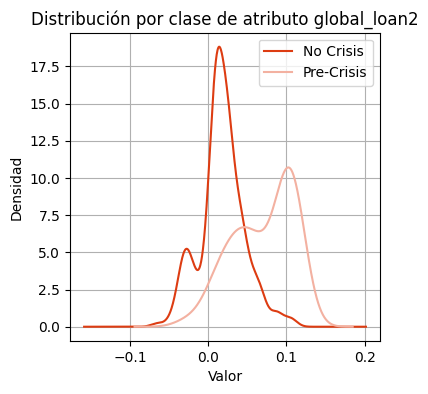

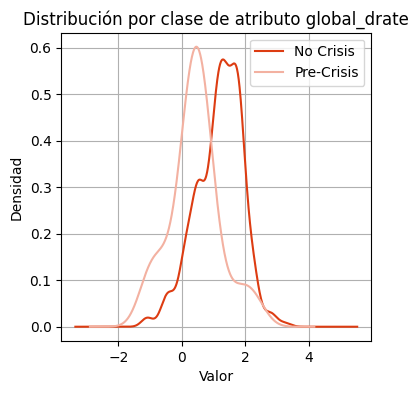

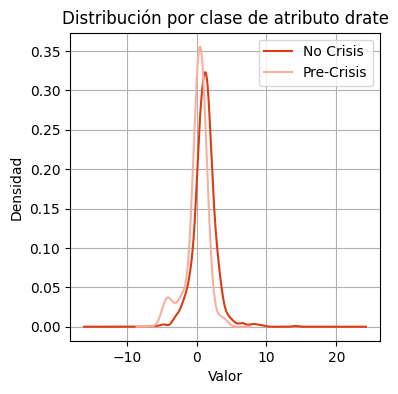

In [25]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#dd3c12', '#f3b1a1'])
for i in range(data.shape[1]-3):
    f, ax = plt.subplots()
    data.groupby("crisisJST")[columnas[i]].plot.kde(ax=ax, figsize=(4,4))
    ax.set_ylabel('Densidad')
    ax.set_xlabel('Valor')
    plt.legend(etiquetas)
    plt.title('Distribución por clase de atributo ' + columnas[i])
    plt.grid()
    plt.savefig('../app/graficas/comprension_final_distribucion_atributos_clase_' + str(i) + '.png', bbox_inches='tight')
    plt.show()

In [26]:
# f, ax = plt.subplots(11,1,2)

# for i in range(data.shape[1]-3):
    
#     data[data['crisisJST']==0].plot.barh(ax=ax[i,1,0])
#     # data.groupby("crisisJST")[columnas[i]].plot.hist(ax=ax)
#     data[data['crisisJST']==1].plot.barh(ax=ax[i,1,1])
#     ax[i,1,0].set_ylabel('Densidad')
#     plt.legend(['No Crisis', 'Pre-Crisis'])
#     plt.grid()
#     plt.show()

In [27]:
# fig, ax = plt.subplots(data.shape[1]-3), 1, figsize=(10, 5))
# for i in range(data.shape[1]-3):
#     plt.scatter(data.index, data[columnas[i]], c=data['crisisJST'], cmap=viu_cmap) 
#     plt.show()

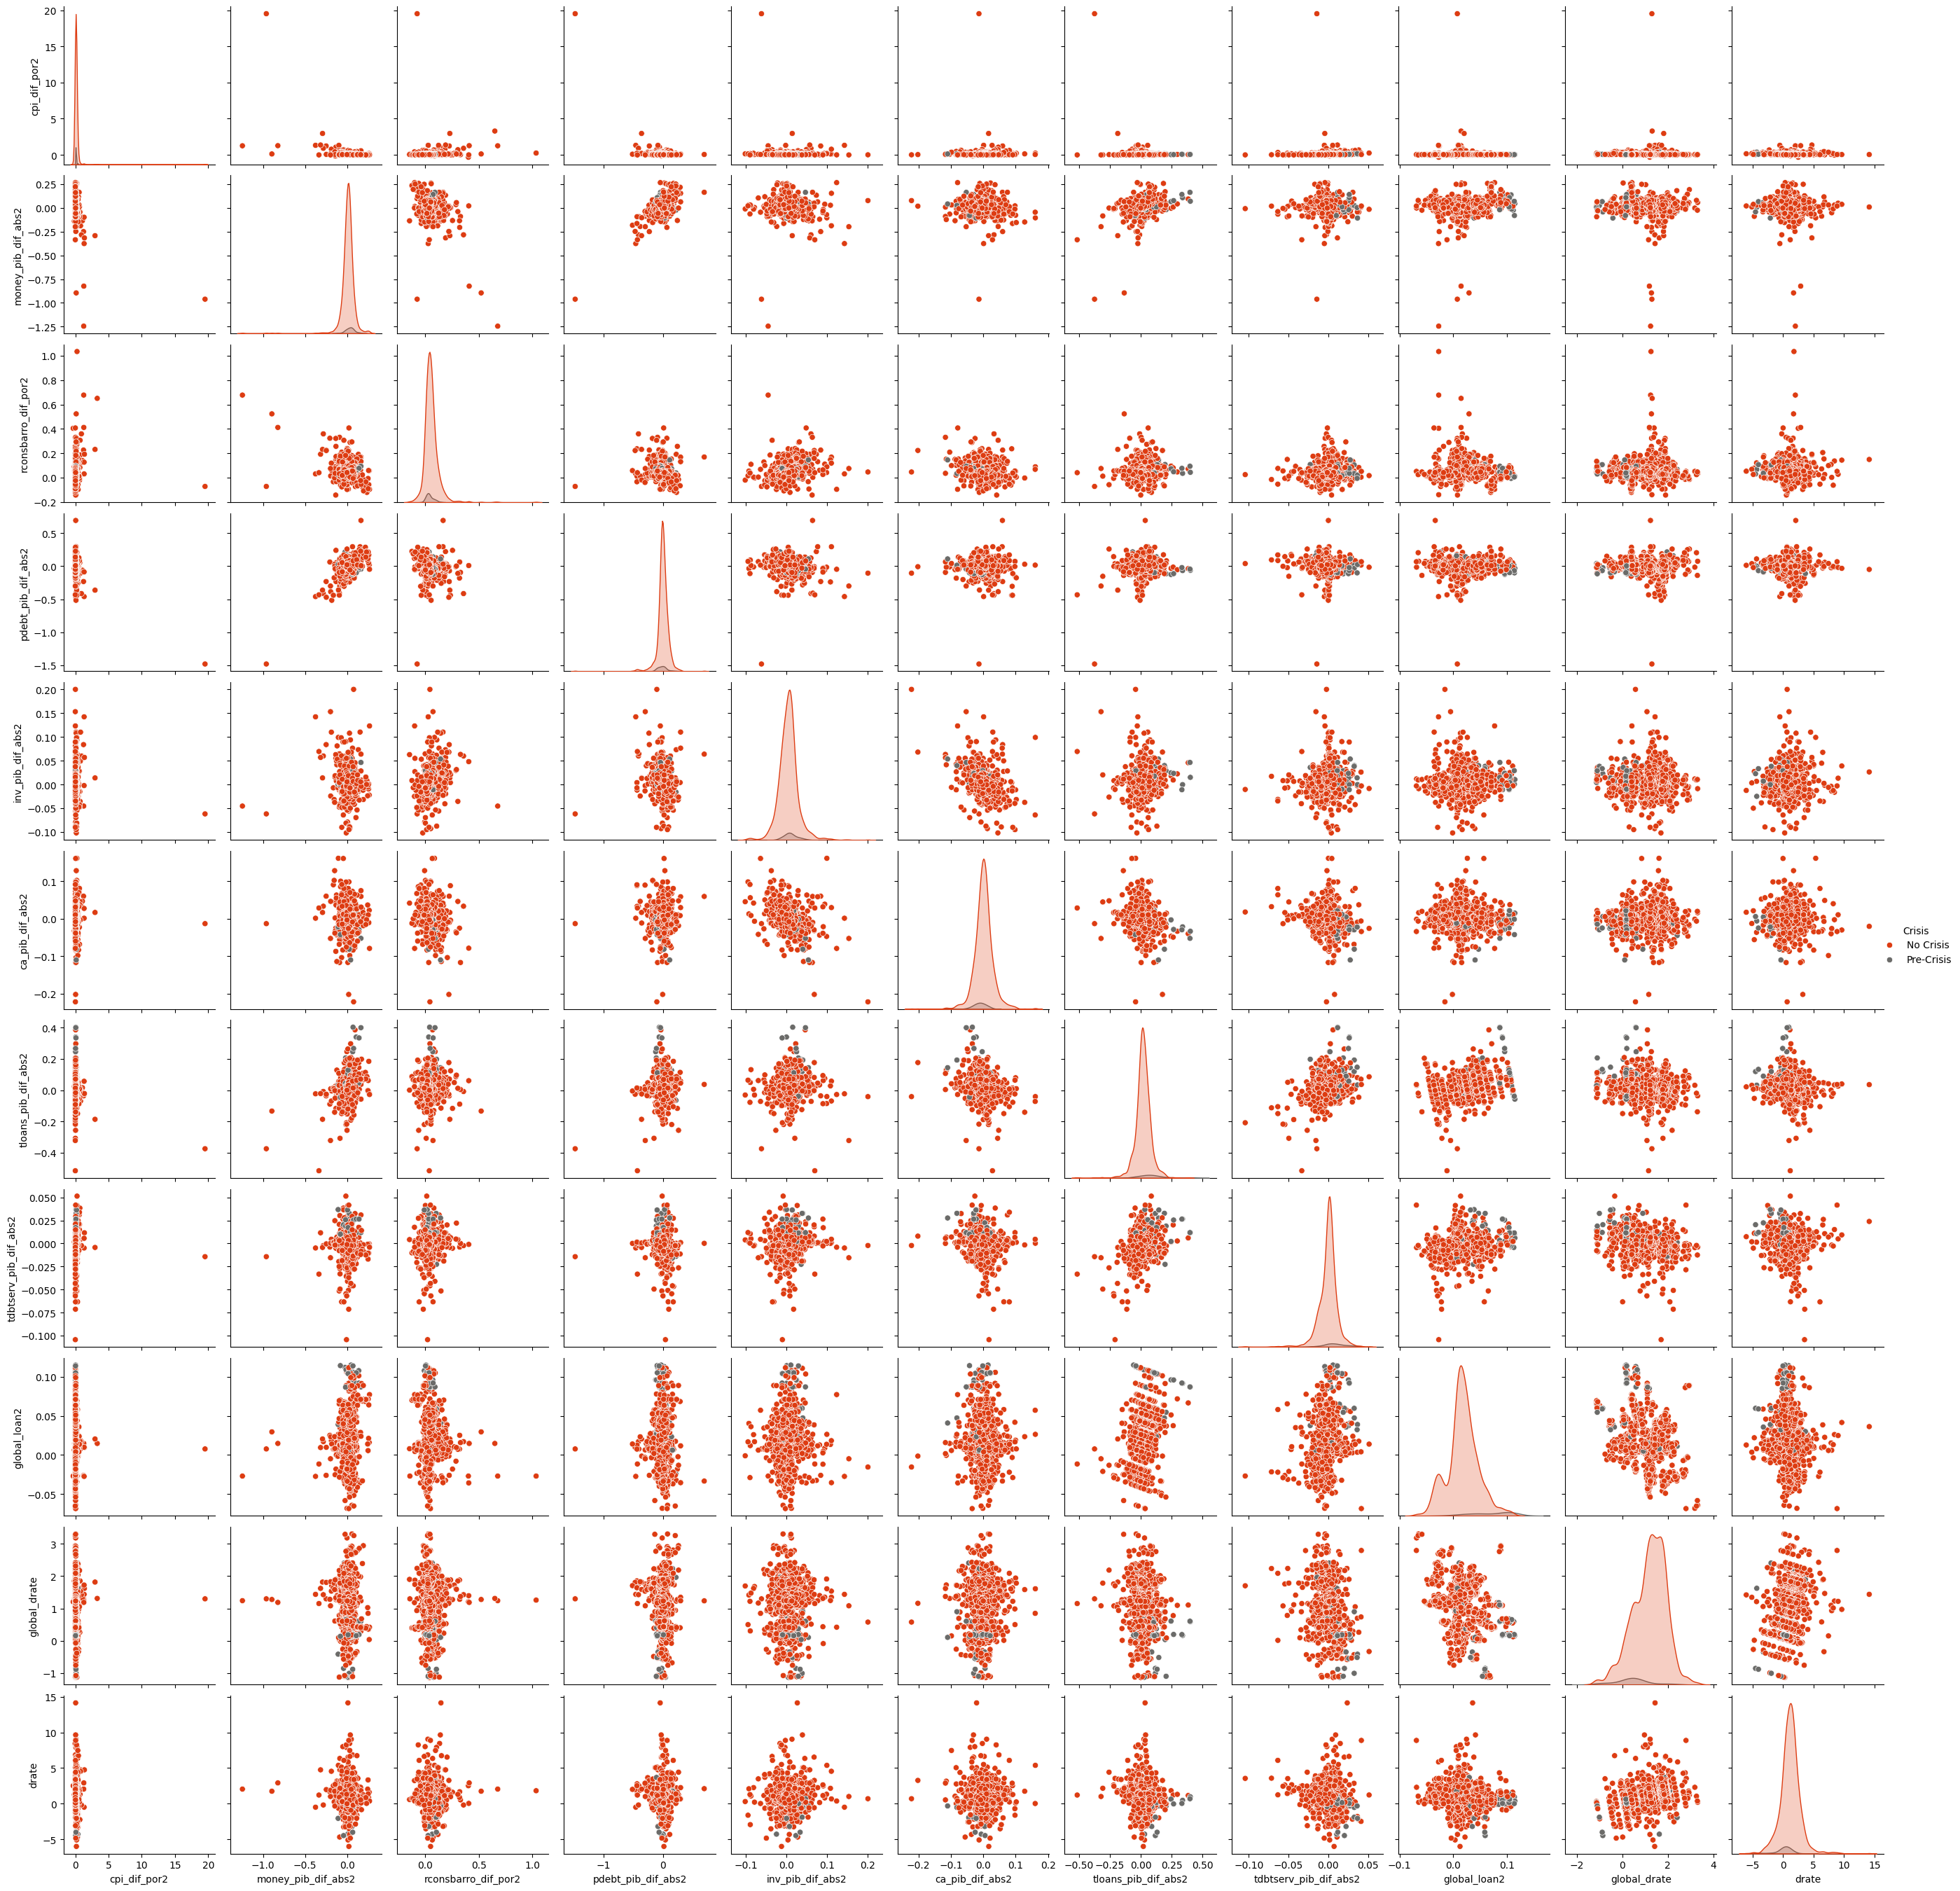

In [28]:
scatter_colors = ['#dd3c12', '#6b6b69']
grafico = sns.pairplot(data.loc[:, ~data.columns.isin(['year', 'iso'])], hue='crisisJST', palette=sns.color_palette(scatter_colors))
grafico._legend.set_title("Crisis")
for i, j in zip(grafico._legend.texts, etiquetas): i.set_text(j)
plt.savefig('../app/graficas/comprension_final_pairplot.png', bbox_inches='tight')
plt.show()

## Guardamos el dataset creado

In [29]:
import os
if not os.path.exists('../datasets/finales'):
    os.mkdir('../datasets/finales')

data.to_csv('../datasets/finales/data_final.csv', sep=';', na_rep='', decimal=',', index=False)